In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Загрузка и подготовка данных

In [2]:
user_event = pd.read_csv('../examples/user_event_test.csv')
user_event.drop(columns='Unnamed: 0', inplace=True)
user_activity = user_event.groupby('user_id')['clicks_count'].count().sort_values(ascending=False).reset_index()

#### Из выборки необходимо исключить пользователей, которые кликнули только один раз, так как для них нельзя провести валидацию

In [ ]:
user_activity.drop(user_activity[user_activity.clicks_count == 1].index, inplace=True)
user_activity

#### Разбиваем выборку на интервалы по количествам кликов

In [5]:
user_activity['diapason'] = pd.cut(user_activity['clicks_count'], bins=np.linspace(0, 70, 15))
user_activity

,user_id,clicks_count,diapason
0,59d8dd14f107e5422792cb46eb283571,66,"(65.0, 70.0]"
1,2ac696ca03552f5644a67585ff5721ce,57,"(55.0, 60.0]"
2,089f10750ef74dc32a62121e31ebd624,54,"(50.0, 55.0]"
3,7a3b84327fbdeda2be46edf02d259efb,50,"(45.0, 50.0]"
4,6396c1dcc2b8750513e931edf3438427,46,"(45.0, 50.0]"
...,...,...,...
6418,298c14b11b549e1a97479260e2892d2a,2,"(0.0, 5.0]"
6419,5ab3707d556a970cca9b8b670532e422,2,"(0.0, 5.0]"
6420,29b80e9aa8505d3dc46eebea5ab52b9f,2,"(0.0, 5.0]"
6421,5a5b660d4d5d53056747e52eb26d918c,2,"(0.0, 5.0]"


In [6]:
pd.cut(user_activity['clicks_count'], bins=np.linspace(0, 70, 15)).value_counts()

(0.0, 5.0]      5091
(5.0, 10.0]      949
(10.0, 15.0]     211
(15.0, 20.0]      85
(20.0, 25.0]      37
(30.0, 35.0]      17
(25.0, 30.0]      16
(40.0, 45.0]       6
(35.0, 40.0]       5
(45.0, 50.0]       3
(50.0, 55.0]       1
(55.0, 60.0]       1
(65.0, 70.0]       1
(60.0, 65.0]       0
Name: clicks_count, dtype: int64

## Вычисление точности рекомендации

In [7]:
from recommenders.implicit_models import EventRecommender
from typing import Optional


In [8]:
def validate(
        user_id: str,
        user_event_df: pd.DataFrame,
        min_size_of_clicked: int = 5,
        number_of_recommended = 10
) -> Optional[float]:
    clicked_by_user = user_event_df.loc[user_event_df.user_id == user_id]

    if clicked_by_user.shape[0] <= 1:
        return None

    if clicked_by_user.shape[0] > min_size_of_clicked:
        clicked_by_user = clicked_by_user.sample(n=min_size_of_clicked)

    count = 0
    for _, clicked_event in clicked_by_user.iterrows():
        example =  user_event_df[(user_event_df.user_id == clicked_event.user_id) &
                          (user_event_df.event_id == clicked_event.event_id)]
        us_ev = user_event_df.drop(example.index)
        recommender = EventRecommender(us_ev, 'als')
        recommended_to_user = recommender.get_quick_user_recommendation(user_id, number_of_recommended)

        if example.iloc[0].event_id in list(recommended_to_user.event_id.values):
            count += 1

    return round(count / len(clicked_by_user), 2)


## Выбираем пользователя из интервалов

In [9]:
def get_probability_distribution(user_activity_df: pd.DataFrame, num_of_recommended: int) -> dict:
    histogram = dict()
    for i in list(user_activity_df['diapason'].unique()):
        interval = user_activity_df.loc[user_activity_df.diapason == i]
        user_from_interval = interval.sample().iloc[0]
        if prob := validate(
                user_id=user_from_interval.user_id,
                user_event_df=user_event,
                number_of_recommended=num_of_recommended):
            histogram[i] = prob

    return histogram

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

{Interval(55.0, 60.0, closed='right'): 0.4,
 Interval(50.0, 55.0, closed='right'): 0.2,
 Interval(35.0, 40.0, closed='right'): 0.2,
 Interval(30.0, 35.0, closed='right'): 0.4,
 Interval(20.0, 25.0, closed='right'): 0.6,
 Interval(10.0, 15.0, closed='right'): 0.2,
 Interval(5.0, 10.0, closed='right'): 0.6,
 Interval(0.0, 5.0, closed='right'): 1.0}

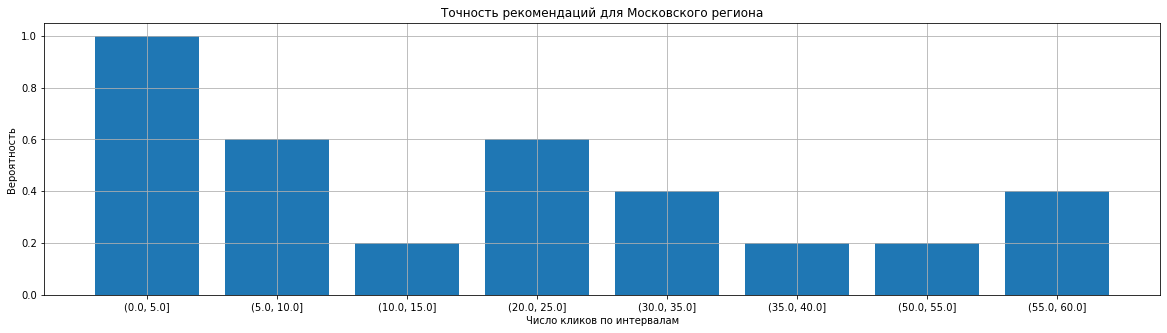

In [10]:
hist = get_probability_distribution(user_activity_df=user_activity)
keys = [str(i) for i in hist.keys()][::-1]
values = list(hist.values())[::-1]


plt.figure(figsize=(20, 5))
plt.title('Точность рекомендаций для Московского региона')
plt.xlabel('Число кликов по интервалам')
plt.ylabel('Вероятность')
plt.bar(keys, values)
plt.grid(True)